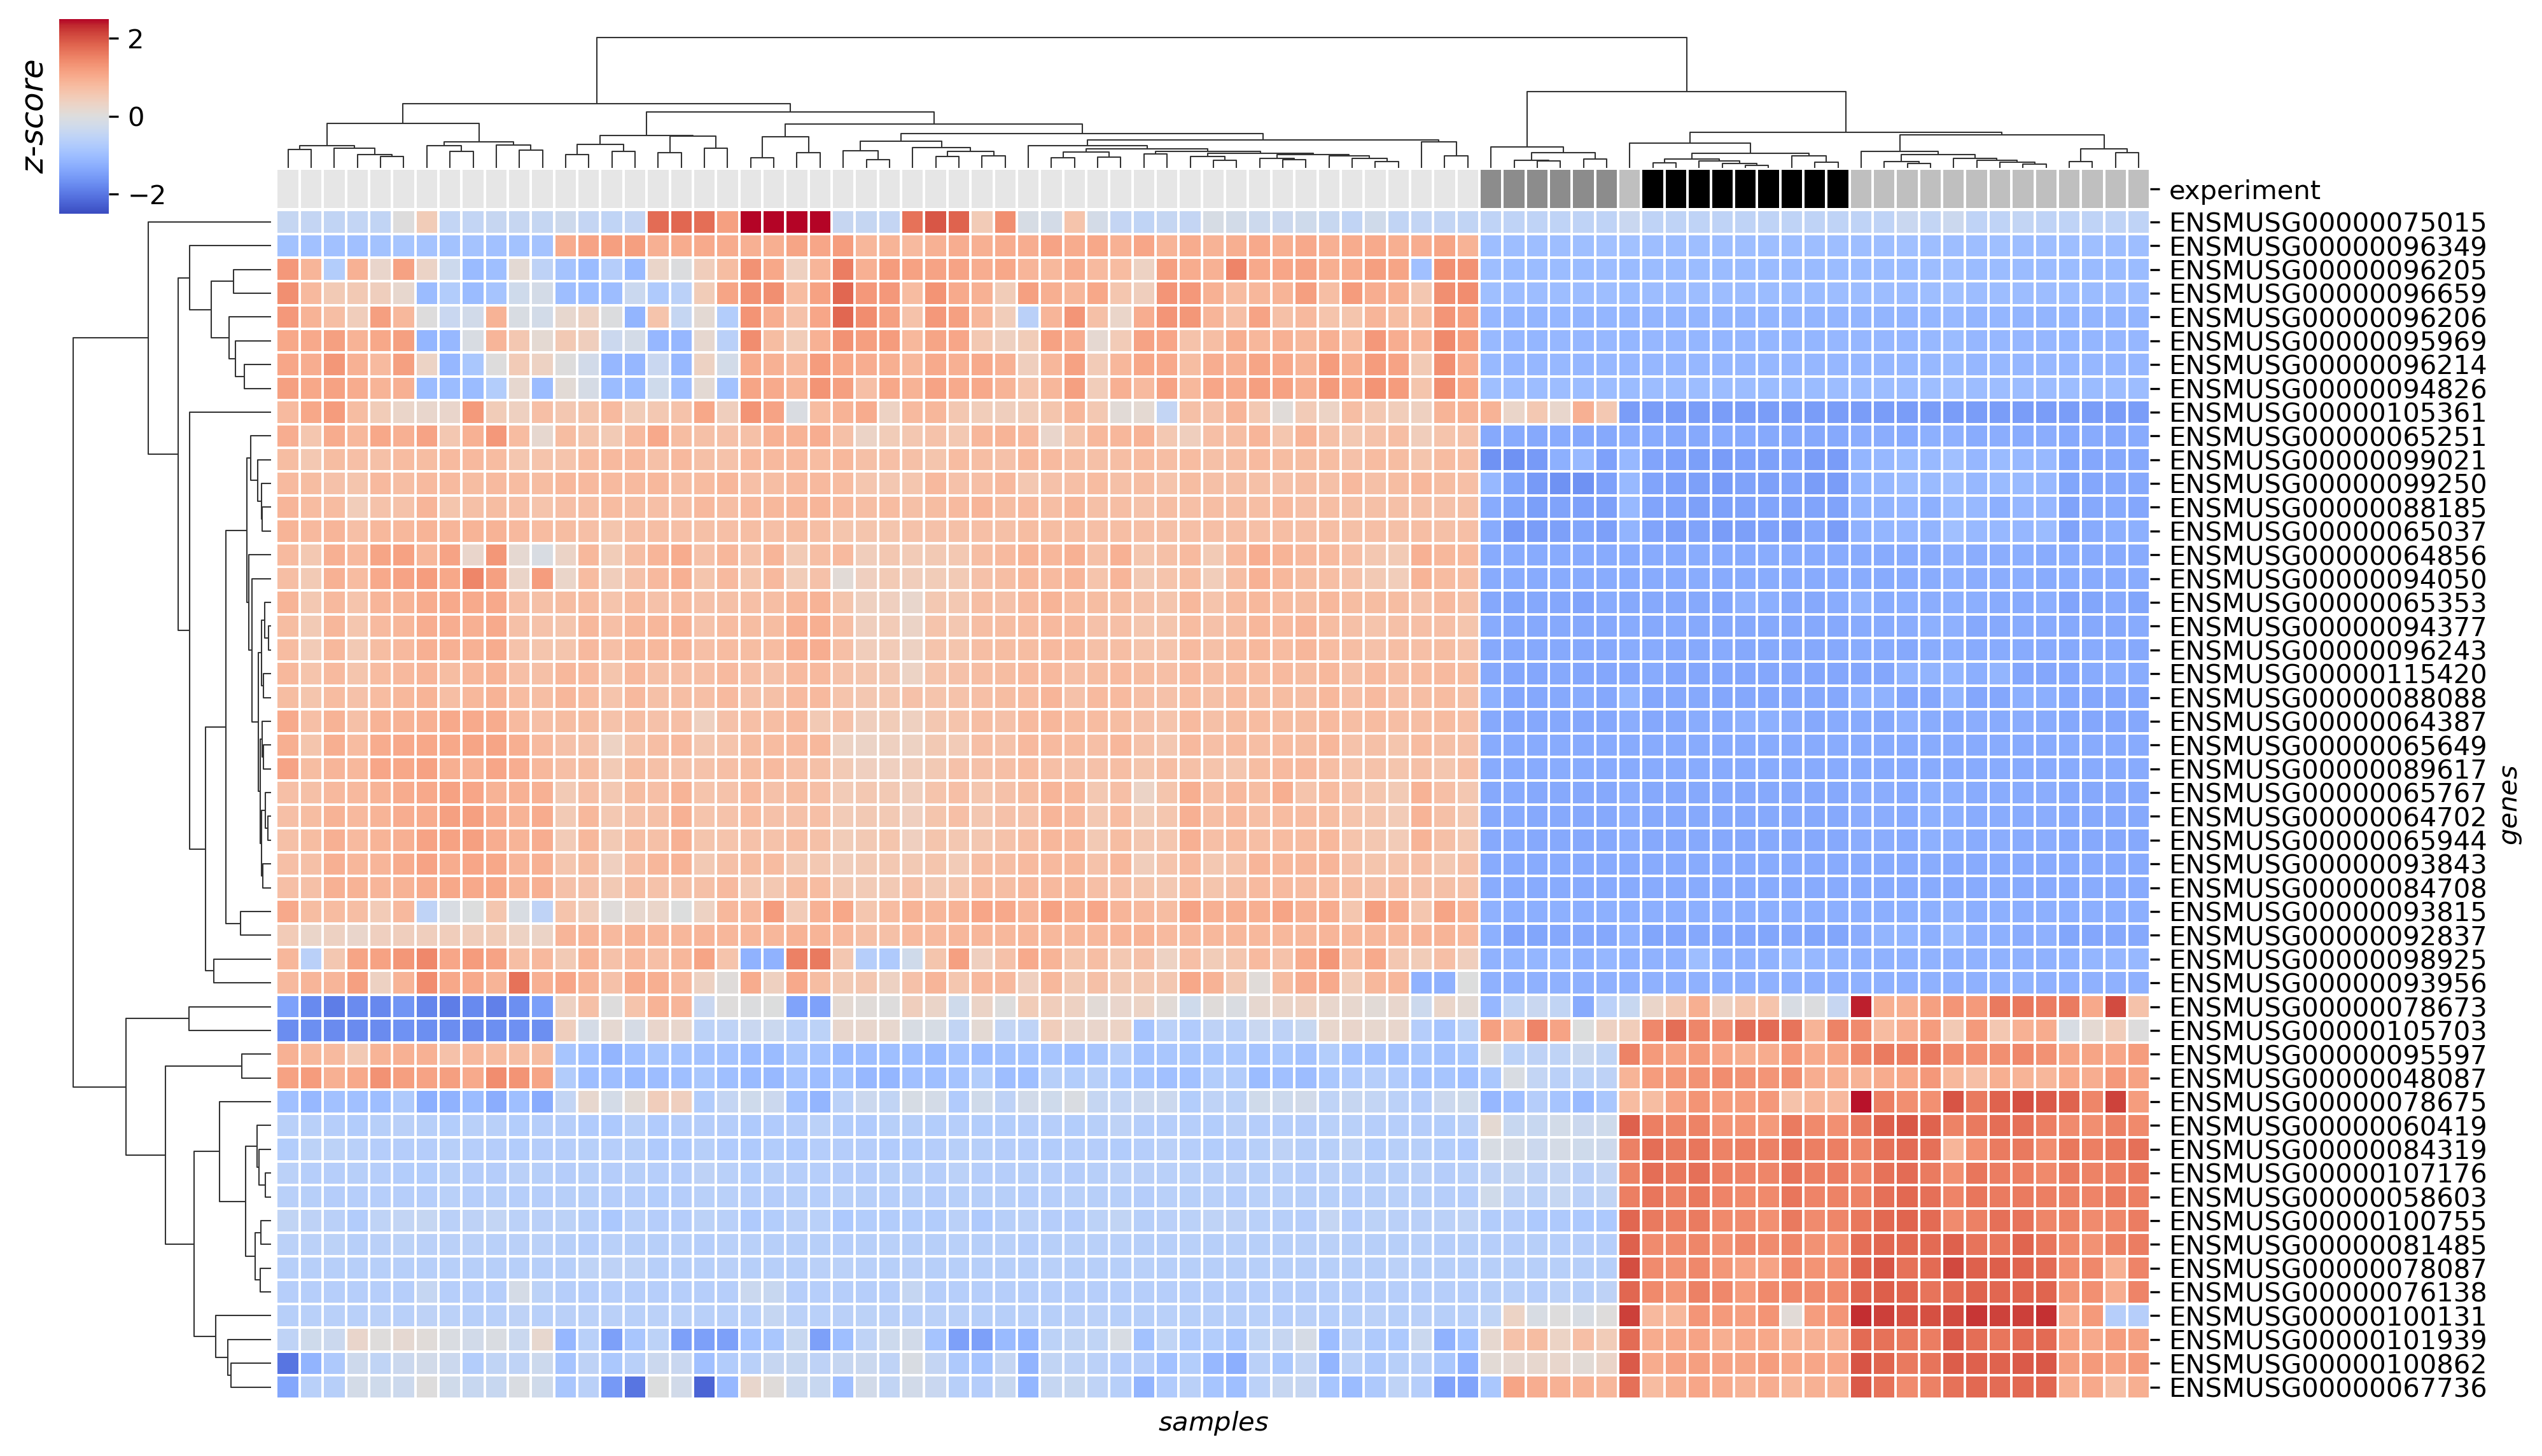

In [1]:
import numpy as np, pandas as pd, seaborn as sns, urllib.parse as urlparse

API_ROOT = "https://visualization.genelab.nasa.gov/GLOpenAPI"
query = "&".join(f"{urlparse.quote(k)}={urlparse.quote(v)}" for k, v in [
    ("study.factor value.spaceflight", ""),
    ("investigation.study assays.study assay technology type", "RNA Sequencing (RNA-Seq)"),
    ("study.characteristics.organism", "Mus musculus"),
    ("study.characteristics.material type", "Liver"),
    ("file.datatype", "unnormalized counts"),
])

data = pd.read_csv(f"{API_ROOT}/data/?{query}", header=[0, 1, 2], index_col=0, escapechar="#")
lognormdata = np.log10(.1 + data / data.mean(axis=0)).dropna()

colors = dict(zip(set(data.columns.get_level_values(0)), (".0", ".55", ".75", ".9")))
g = sns.clustermap(
    data=lognormdata.reindex(lognormdata.std(axis=1).sort_values().index)[-50:], z_score=0, method="complete",
    cmap="coolwarm", vmin=-2.5, vmax=2.5, lw=.5,
    col_colors=pd.Series(name="experiment", index=data.columns, data=[colors[c[0]] for c in data]),
    figsize=(13, 17), cbar_pos=(.01, .935, .02, .06), dendrogram_ratio=.1,
)

g.ax_cbar.text(s="$z$-$score$", rotation=90, x=-5, y=0, ha="center", va="center", size=12)
g.ax_heatmap.set(xticks=[], xlabel="$samples$", ylabel="$genes$")
g.fig.dpi = 300